<a href="https://colab.research.google.com/github/bhnunes/FE067A/blob/main/Questao_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***1. Importar bibliotecas:***

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

***2. Carregar e preparar os dados:***

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# Selecionar classes
classes = [0, 1, 2, 3, 4]  # Selecione 5 classes do CIFAR-10

x_train = x_train[np.isin(y_train.flatten(), classes)]
y_train = y_train[np.isin(y_train.flatten(), classes)]
x_test = x_test[np.isin(y_test.flatten(), classes)]
y_test = y_test[np.isin(y_test.flatten(), classes)]

In [4]:
# Normalizar os dados
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [5]:
# Converter rótulos em one-hot encoding
y_train = to_categorical(y_train, num_classes=len(classes))
y_test = to_categorical(y_test, num_classes=len(classes))

In [6]:
# Criar conjuntos de treino e validação
x_train, x_val, y_train, y_val = x_train[:-500], x_train[-500:], y_train[:-500], y_train[-500:]

***3. Criar o modelo de Few-Shot Learning:***

In [7]:
def criar_modelo(input_shape):
  modelo = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(classes), activation='softmax')
  ])
  return modelo

In [8]:
modelo = criar_modelo((32, 32, 3))
modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

***4. Treinar o modelo:***

In [9]:
# Treinar com poucos exemplos por classe
n_exemplos_por_classe = 5

# Criar conjuntos de treinamento de poucas amostras
x_train_few_shot = []
y_train_few_shot = []

In [10]:
for classe in range(len(classes)):
  indices = np.where(np.argmax(y_train, axis=1) == classe)[0]
  x_train_few_shot.append(x_train[indices[:n_exemplos_por_classe]])
  y_train_few_shot.append(y_train[indices[:n_exemplos_por_classe]])

x_train_few_shot = np.concatenate(x_train_few_shot)
y_train_few_shot = np.concatenate(y_train_few_shot)

# Treinar o modelo com poucas amostras
modelo.fit(x_train_few_shot, y_train_few_shot, epochs=50, validation_data=(x_val, y_val))


Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 1.6115 - accuracy: 0.2400 - val_loss: 1.5910 - val_accuracy: 0.1940
Epoch 2/50
1/1 [==============================] - 0s 395ms/step - loss: 1.5512 - accuracy: 0.2800 - val_loss: 1.5894 - val_accuracy: 0.2220
Epoch 3/50
1/1 [==============================] - 0s 381ms/step - loss: 1.4951 - accuracy: 0.4000 - val_loss: 1.5814 - val_accuracy: 0.2620
Epoch 4/50
1/1 [==============================] - 1s 718ms/step - loss: 1.4324 - accuracy: 0.6000 - val_loss: 1.5717 - val_accuracy: 0.3280
Epoch 5/50
1/1 [==============================] - 1s 815ms/step - loss: 1.3657 - accuracy: 0.8400 - val_loss: 1.5589 - val_accuracy: 0.3220
Epoch 6/50
1/1 [==============================] - 1s 709ms/step - loss: 1.2917 - accuracy: 0.8800 - val_loss: 1.5498 - val_accuracy: 0.3240
Epoch 7/50
1/1 [==============================] - 0s 196ms/step - loss: 1.2119 - accuracy: 0.8400 - val_loss: 1.5482 - val_accuracy: 0.3260
Epoch 8/50
1/1 [=======

***5. Avaliar o modelo:***

In [11]:
loss, accuracy = modelo.evaluate(x_test, y_test, verbose=0)
print('Loss:', loss)
print('Accuracy:', accuracy)


Loss: 4.4294867515563965
Accuracy: 0.32100000977516174


***6. Mostrar alguns resultados:***

1/1 [==============================] - 0s 108ms/step


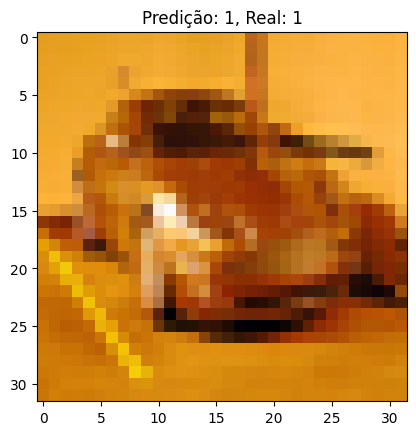

1/1 [==============================] - 0s 20ms/step


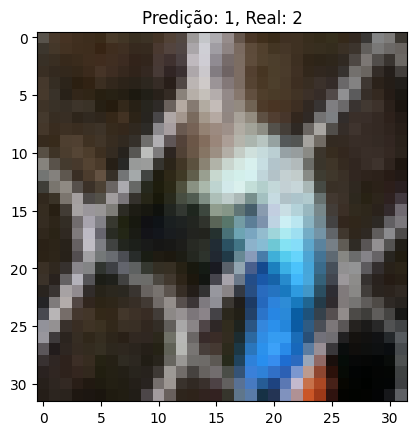

1/1 [==============================] - 0s 19ms/step


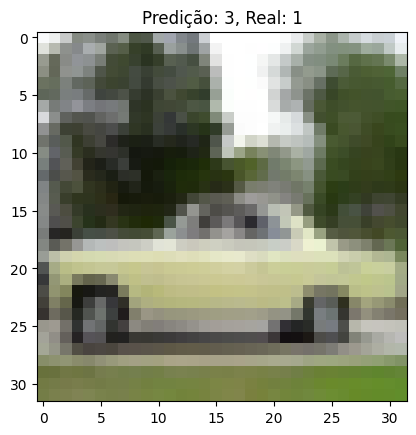

1/1 [==============================] - 0s 34ms/step


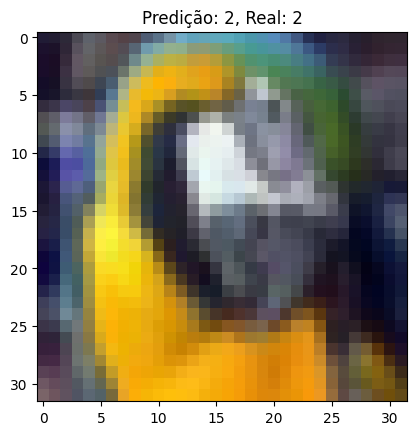

1/1 [==============================] - 0s 32ms/step


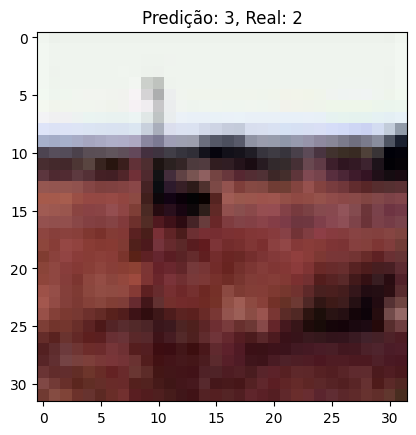

In [12]:
# Mostrar algumas previsões
indices = np.random.choice(len(x_test), size=5, replace=False)
for i in indices:
  imagem = x_test[i]
  previsao = modelo.predict(np.expand_dims(imagem, axis=0))[0]
  classe_previsao = np.argmax(previsao)
  classe_real = np.argmax(y_test[i])
  plt.imshow(imagem)
  plt.title(f'Predição: {classes[classe_previsao]}, Real: {classes[classe_real]}')
  plt.show()


•	A precisão do modelo será limitada devido ao pequeno número de exemplos de treinamento.